In [60]:
import json

# Replace 'your_input_file.json' and 'your_output_file.jsonl' with the actual paths
input_file_path = 'conversations.json'
output_file_path = 'conversations.jsonl'

def convert_to_json_lines(input_file, output_file):
    try:
        with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
            json_data = json.load(infile)
            for line in json_data:
                json_line = json.dumps(line)
                outfile.write(json_line + '\n')
    except FileNotFoundError:
        print(f"The file '{input_file}' was not found.")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")

convert_to_json_lines(input_file_path, output_file_path)


In [10]:
import jsonlines

# Specify the path to the input jsonl file
input_file = 'conversations.jsonl'

# Specify the path to the output jsonl file
output_file = 'conversations_empty.jsonl'

# Open the input and output files
with jsonlines.open(input_file) as reader, jsonlines.open(output_file, mode='w') as writer:
    # Iterate over each entry in the input file
    for entry in reader:
        # Iterate over each message in the mapping
        for message_id, message in entry['mapping'].items():
            # Check if the message field is not None
            if message['message'] is not None:
                # Delete the content of the message
                message['message']['content']['parts'] = []
        
        # Write the modified entry to the output file
        writer.write(entry)

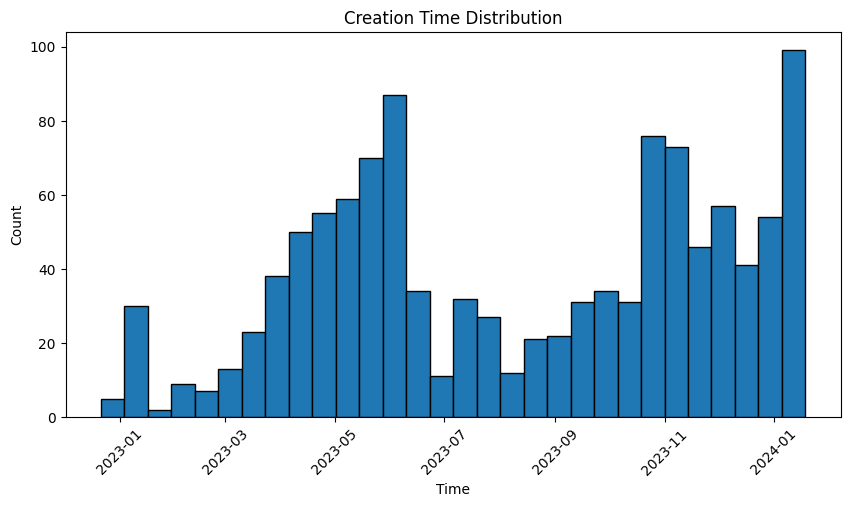

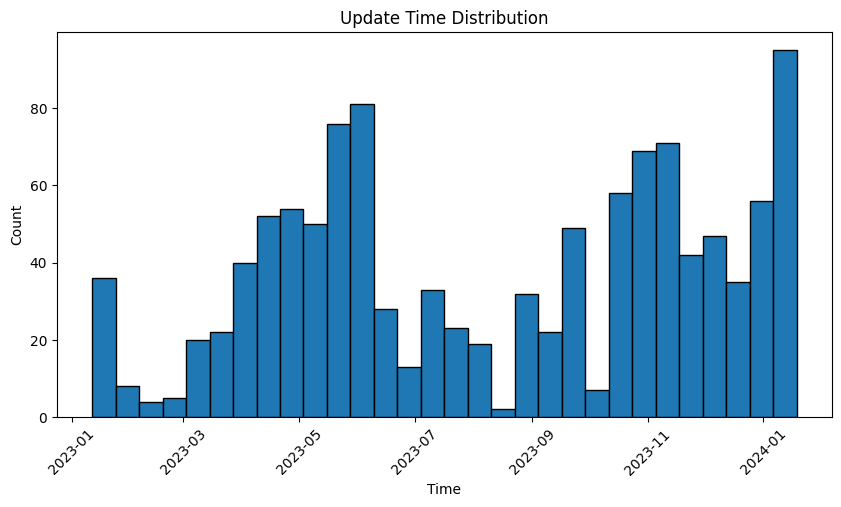

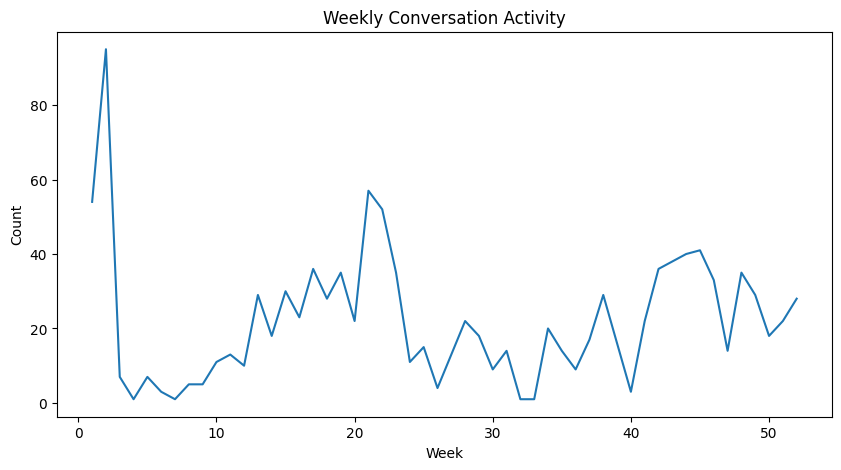

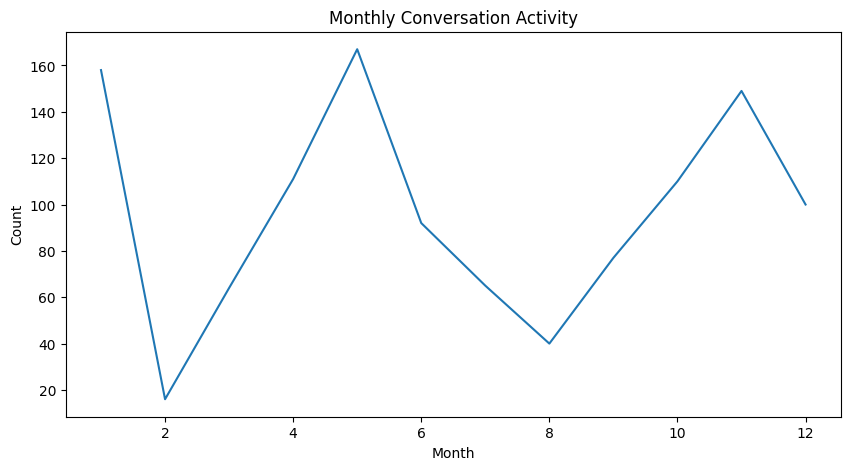

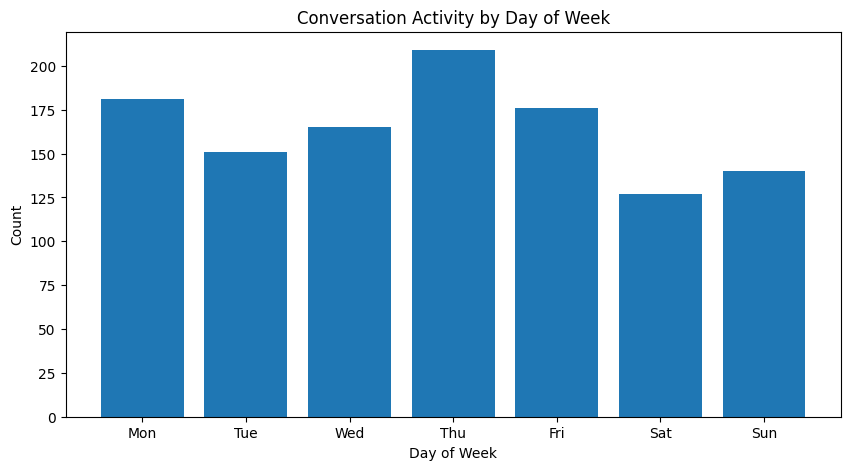

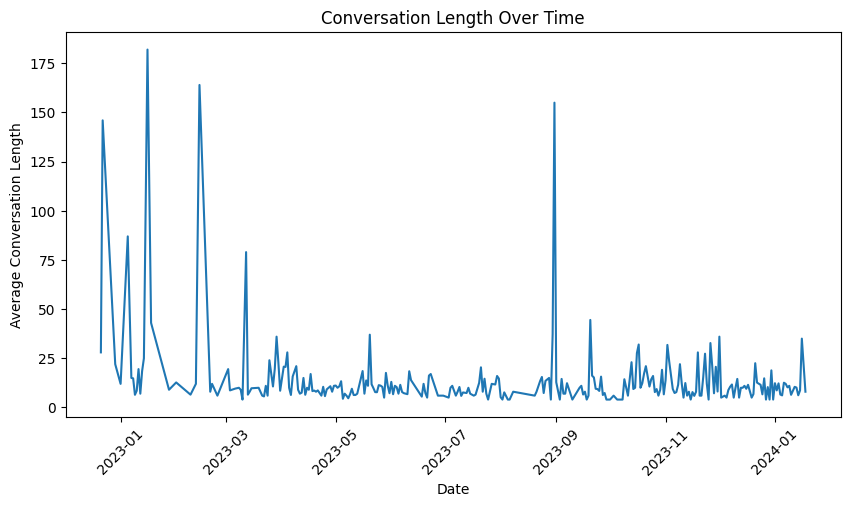

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Read the jsonl file and load conversations into a list
conversations = []
with open('conversations.jsonl', 'r') as file:
    for line in file:
        conversations.append(json.loads(line))

# Extract creation and update timestamps from conversations
creation_times = []
update_times = []
for conversation in conversations:
    creation_times.append(datetime.fromtimestamp(conversation['create_time']))
    update_times.append(datetime.fromtimestamp(conversation['update_time']))

# Plot creation time distribution
plt.figure(figsize=(10, 5))
plt.hist(creation_times, bins=30, edgecolor='black')
plt.title('Creation Time Distribution')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot update time distribution
plt.figure(figsize=(10, 5))
plt.hist(update_times, bins=30, edgecolor='black')
plt.title('Update Time Distribution')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Convert timestamps to pandas datetime for further analysis
df = pd.DataFrame({'Creation Time': pd.to_datetime(creation_times),
                   'Update Time': pd.to_datetime(update_times)})

# Group conversations based on weeks and months
df['Week'] = df['Creation Time'].dt.isocalendar().week
df['Month'] = df['Creation Time'].dt.month

# Weekly/Monthly patterns analysis
weekly_counts = df.groupby('Week').size()
monthly_counts = df.groupby('Month').size()

# Plot weekly pattern
plt.figure(figsize=(10, 5))
plt.plot(weekly_counts.index, weekly_counts.values)
plt.title('Weekly Conversation Activity')
plt.xlabel('Week')
plt.ylabel('Count')
plt.show()

# Plot monthly pattern
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts.index, monthly_counts.values)
plt.title('Monthly Conversation Activity')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Day of the week analysis
df['Day of Week'] = df['Creation Time'].dt.dayofweek
day_of_week_counts = df.groupby('Day of Week').size()

# Plot day of the week analysis
plt.figure(figsize=(10, 5))
plt.bar(day_of_week_counts.index, day_of_week_counts.values)
plt.title('Conversation Activity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Conversation length over time
conversation_lengths = []
for conversation in conversations:
    message_count = len(conversation['mapping'])
    conversation_lengths.append(message_count)

df['Conversation Length'] = conversation_lengths

# Calculate average conversation length per day
average_length_per_day = df.groupby(df['Creation Time'].dt.date)['Conversation Length'].mean()

# Plot conversation length trends
plt.figure(figsize=(10, 5))
plt.plot(average_length_per_day.index, average_length_per_day.values)
plt.title('Conversation Length Over Time')
plt.xlabel('Date')
plt.ylabel('Average Conversation Length')
plt.xticks(rotation=45)
plt.show()

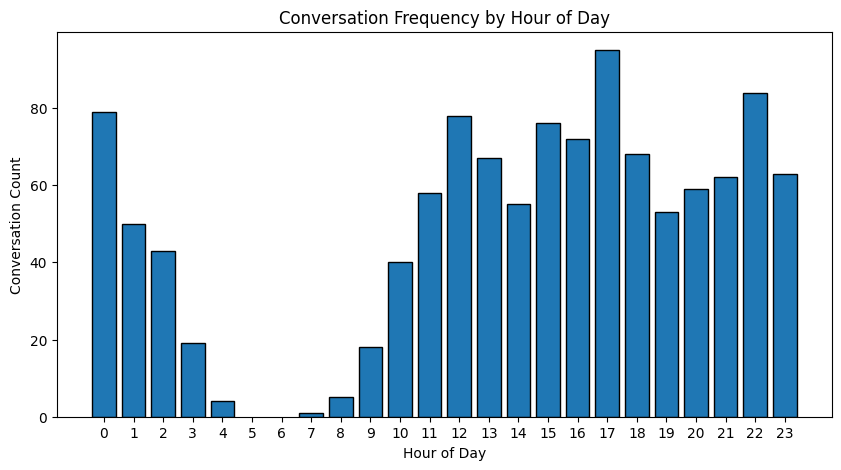

In [35]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Read the jsonl file and load conversations into a list
conversations = []
with open('conversations.jsonl', 'r') as file:
    for line in file:
        conversations.append(json.loads(line))

# Extract creation timestamps from conversations and convert them to pandas datetime
creation_times = [datetime.fromtimestamp(conversation['create_time']) for conversation in conversations]
df = pd.DataFrame({'Creation Time': pd.to_datetime(creation_times)})

# Extract hour of day from creation timestamps
df['Hour of Day'] = df['Creation Time'].dt.hour

# Group conversations by hour of day and count the number
hourly_counts = df.groupby('Hour of Day').size()

# Plot the frequency of conversations by hour of day
plt.figure(figsize=(10, 5))
plt.bar(hourly_counts.index, hourly_counts.values, edgecolor='black')
plt.title('Conversation Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Conversation Count')
plt.xticks(range(0, 24))  # Set x-ticks to show every hour
plt.show()

# # To analyze how often you use ChatGPT, we can count the number of conversations per day
# daily_counts = df['Creation Time'].dt.date.value_counts()

# # Plot the frequency of conversations by day
# plt.figure(figsize=(10, 5))
# plt.bar(daily_counts.index, daily_counts.values, edgecolor='black')
# plt.title('Daily Conversation Frequency')
# plt.xlabel('Date')
# plt.ylabel('Conversation Count')
# plt.xticks(rotation=90)  # Rotate x-ticks to show dates clearly
# plt.show()

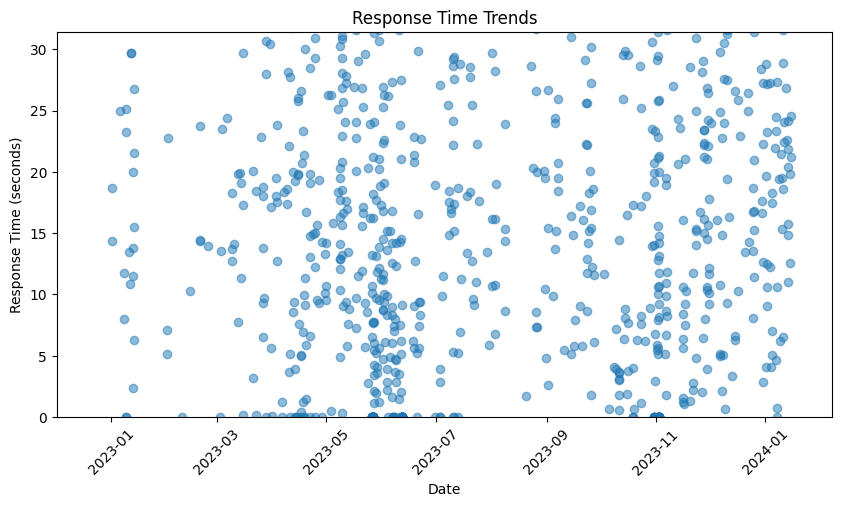

In [44]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Read the jsonl file and load conversations into a list
conversations = []
with open('conversations.jsonl', 'r') as file:
    for line in file:
        conversations.append(json.loads(line))

# Calculate response time for each conversation
response_times = []
conversation_dates = []
for conversation in conversations:
    mapping = conversation['mapping']
    message_ids = list(mapping.keys())
    message_ids.sort()
    for i in range(1, len(message_ids)):
        curr_message = mapping[message_ids[i]]
        prev_message = mapping[message_ids[i - 1]]
        if curr_message['message'] is not None and prev_message['message'] is not None:
            curr_create_time = curr_message['message']['create_time']
            prev_create_time = prev_message['message']['create_time']
            if curr_create_time is not None and prev_create_time is not None:
                response_time = curr_create_time - prev_create_time
                if response_time >= 0:
                    response_times.append(response_time)
                    conversation_dates.append(conversation['create_time'])

# Convert conversation dates to pandas datetime
conversation_dates = pd.to_datetime(conversation_dates, unit='s')

# Plot response time trends as scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(conversation_dates, response_times, alpha=0.5)
plt.title('Response Time Trends')
plt.xlabel('Date')
plt.ylabel('Response Time (seconds)')
plt.xticks(rotation=45)
plt.ylim(0, max(response_times) * 0.00002)  # Adjust y-axis scale
# plt.yscale('log')  # Use log scale for y-axis
plt.show()

Total wait time for ChatGPT responses after excluding top 10% longest responses: 1958865.8190689087 seconds
Total wait time for ChatGPT responses after excluding top 10% longest responses: 544.129394185808 hours


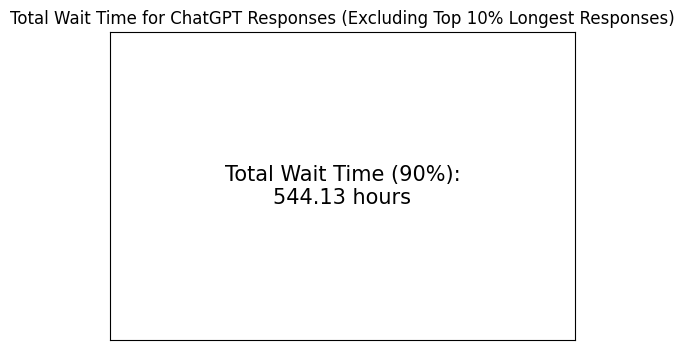

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming response_times is the list of response times between messages

# Sort the response times
sorted_response_times = sorted(response_times)

# Determine the cutoff index for the top 10%
cutoff_index = int(len(sorted_response_times) * 0.8)

# Exclude the top 10% of the highest response times
filtered_response_times = sorted_response_times[:cutoff_index]

# Calculate the total wait time in seconds after excluding the top 10%
total_wait_time_seconds = sum(filtered_response_times)

# Convert the total wait time to a more readable format (e.g., in hours)
total_wait_time_hours = total_wait_time_seconds / 3600

# Print the total wait time after excluding the top 10% of response times
print(f"Total wait time for ChatGPT responses after excluding top 20% longest responses: {total_wait_time_seconds} seconds")
print(f"Total wait time for ChatGPT responses after excluding top 20% longest responses: {total_wait_time_hours} hours")

# Visualize the total wait time using matplotlib's text display capabilities
fig, ax = plt.subplots(figsize=(6, 4))

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

# Display the total wait time as text
ax.text(0.5, 0.5, f"Total Wait Time (90%):\n{total_wait_time_hours:.2f} hours", 
        fontsize=15, ha='center', va='center')

plt.title('Total Wait Time for ChatGPT Responses (Excluding Top 10% Longest Responses)')
plt.show()

Estimated number of times 'regenerate' button was hit: 1145
Total number of messages: 11155


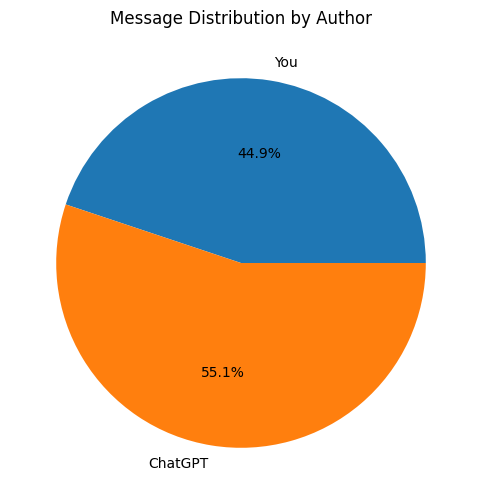

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Read the jsonl file and load conversations into a list
conversations = []
with open('conversations.jsonl', 'r') as file:
    for line in file:
        conversations.append(json.loads(line))

# Dictionary to store message counts for each author
author_message_counts = {
    'You': 0,
    'ChatGPT': 0
}

# Count the number of messages authored by each participant
for conversation in conversations:
    mapping = conversation['mapping']
    for message_id, message in mapping.items():
        if message['message'] is not None:
            author = message['message']['author']['role']
            if author == 'user':
                author_message_counts['You'] += 1
            elif author == 'assistant':
                author_message_counts['ChatGPT'] += 1

# Calculate the total number of messages
total_messages = sum(author_message_counts.values())

# Calculate the percentage contribution of each author
author_percentages = {
    author: (count / total_messages) * 100
    for author, count in author_message_counts.items()
}

num_regenerates = author_message_counts['ChatGPT'] - author_message_counts['You']

print(f"Estimated number of times 'regenerate' button was hit: {num_regenerates}")

# Plot the distribution using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(author_percentages.values(), labels=author_percentages.keys(), autopct='%1.1f%%')
plt.title('Message Distribution by Author')
plt.show()

In [1]:
import json
import pandas as pd

# Read the jsonl file and load conversations into a list
conversations = []
with open('conversations.jsonl', 'r') as file:
    for line in file:
        conversations.append(json.loads(line))

# Dictionary to store total message length for each author
author_message_lengths = {}
# Dictionary to store message count for each author
author_message_counts = {}

# Calculate the total message length and count for each author
for conversation in conversations:
    mapping = conversation['mapping']
    for message_id, message in mapping.items():
        if message is not None and 'author' in message and 'content' in message:
            author = message['author']['role']
            content = message['content']
            if content is not None and 'parts' in content and len(content['parts']) > 0:
                message_length = len(content['parts'][0])
                if author not in author_message_lengths:
                    author_message_lengths[author] = 0
                    author_message_counts[author] = 0
                author_message_lengths[author] += message_length
                author_message_counts[author] += 1

# Calculate the average message length for each author
author_average_lengths = {
    author: author_message_lengths[author] / author_message_counts[author]
    for author in author_message_lengths.keys()
}

# Print the average message length for each author
for author, average_length in author_average_lengths.items():
    print(f"{author}: {average_length:.2f}")

# Compare the average message length between you and ChatGPT
your_average_length = author_average_lengths.get('You', 0)
chatgpt_average_length = author_average_lengths.get('ChatGPT', 0)

print(f"Your average message length: {your_average_length:.2f}")
print(f"ChatGPT's average message length: {chatgpt_average_length:.2f}")

if your_average_length > chatgpt_average_length:
    print("Your messages tend to be longer.")
elif your_average_length < chatgpt_average_length:
    print("ChatGPT's messages tend to be longer.")
else:
    print("There is no significant difference in message length.")

Your average message length: 0.00
ChatGPT's average message length: 0.00
There is no significant difference in message length.


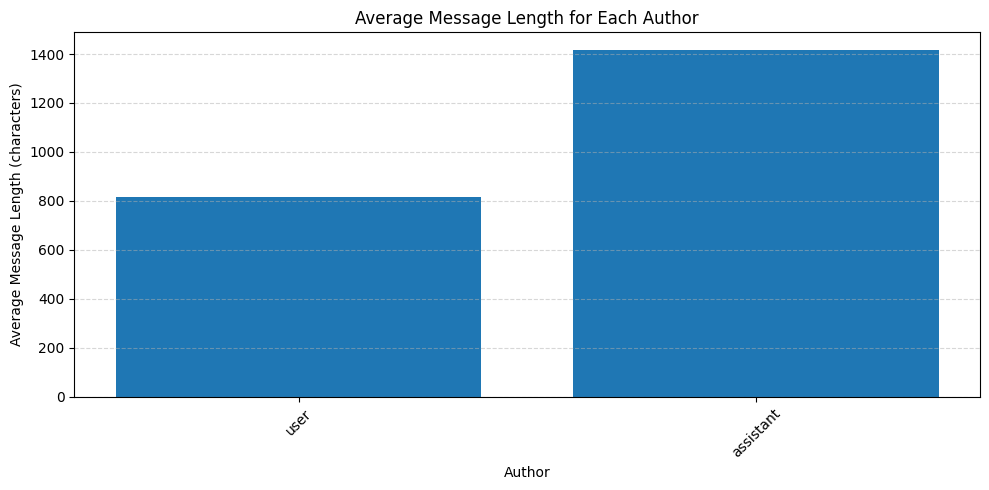

In [13]:
import json
import matplotlib.pyplot as plt

def calculate_average_message_length(jsonl_file_path):
    authors_message_lengths = {}
    authors_message_counts = {}

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            mapping = conversation['mapping']

            for message_id, message_data in mapping.items():
                if message_data['message'] and 'author' in message_data['message']:
                    author = message_data['message']['author']['role']
                    if author != 'system' and author != 'tool': 
                        if 'parts' in message_data['message']['content']:
                            message_content = message_data['message']['content']['parts']
                            message_length = sum(len(part) for part in message_content if isinstance(part, str))
                            authors_message_lengths[author] = authors_message_lengths.get(author, 0) + message_length
                            authors_message_counts[author] = authors_message_counts.get(author, 0) + 1

    average_message_lengths = {author: total_length / authors_message_counts[author]
                               for author, total_length in authors_message_lengths.items()}

    return average_message_lengths

# Replace 'conversations.jsonl' with the path to your actual JSONL file
average_lengths = calculate_average_message_length('conversations.jsonl')

# Create bar plot
authors = average_lengths.keys()
message_lengths = average_lengths.values()

# Beautify the bar plot
plt.figure(figsize=(10, 5))
plt.bar(authors, message_lengths)
plt.xlabel('Author')
plt.ylabel('Average Message Length (characters)')
plt.title('Average Message Length for Each Author')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

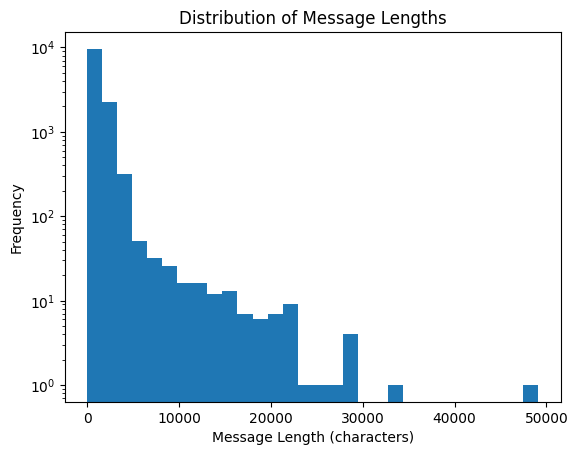

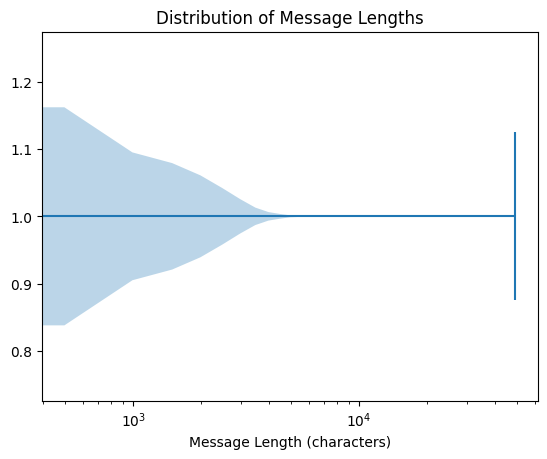

Average Message Length: 1033.5804787619893
Median Message Length: 466.0


In [23]:
import json
import matplotlib.pyplot as plt
import numpy as np

def calculate_message_lengths(jsonl_file_path):
    message_lengths = []

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            mapping = conversation['mapping']

            for message_id, message_data in mapping.items():
                if message_data['message'] and 'content' in message_data['message']:
                    content = message_data['message']['content']
                    if 'parts' in content:
                        message_content = content['parts']
                        message_length = sum(len(part) for part in message_content if isinstance(part, str))
                        message_lengths.append(message_length)

    return message_lengths

# Replace 'conversations.jsonl' with the path to your actual JSONL file
message_lengths = calculate_message_lengths('conversations.jsonl')

# Calculate average and median message lengths
average_length = np.mean(message_lengths)
median_length = np.median(message_lengths)

# Create histogram
plt.hist(message_lengths, bins=30)
plt.xlabel('Message Length (characters)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Distribution of Message Lengths')
plt.show()

# Remove outliers beyond a certain threshold
threshold = 10000
filtered_lengths = [length for length in message_lengths if length <= threshold]

# Create violin plot
plt.violinplot(message_lengths, vert=False)
plt.xlabel('Message Length (characters)')
plt.xscale('log')
plt.title('Distribution of Message Lengths')
plt.show()

print("Average Message Length:", average_length)
print("Median Message Length:", median_length)

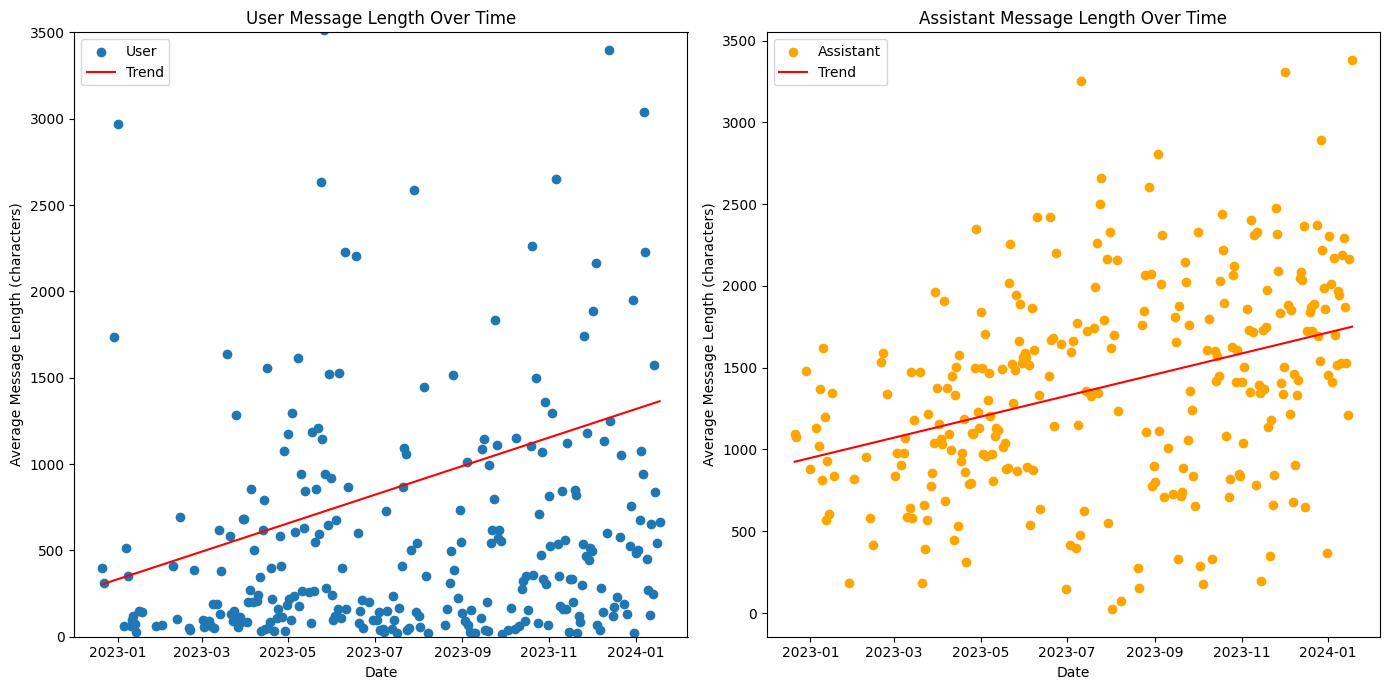

In [27]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates

def analyze_temporal_message_lengths(jsonl_file_path):
    time_author_message_lengths = {}

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            # Handle different timestamp formats
            if isinstance(conversation['create_time'], float):
                create_time = datetime.fromtimestamp(conversation['create_time'])
            else:
                create_time_str = str(conversation['create_time'])
                # Assume ISO format if not a Unix timestamp
                create_time = datetime.fromisoformat(create_time_str.rstrip('Z'))
            
            mapping = conversation['mapping']

            for message_id, message_data in mapping.items():
                if message_data['message'] and 'author' in message_data['message']:
                    author = message_data['message']['author']['role']
                    # Initialize author in dictionary if not already present
                    if author not in time_author_message_lengths:
                        time_author_message_lengths[author] = []
                    content = message_data['message']['content']
                    if 'parts' in content:
                        message_content = content['parts']
                        message_length = sum(len(part) for part in message_content if isinstance(part, str))
                        # Skip non-user and non-assistant authors
                        if author in ['user', 'assistant']:
                            time_author_message_lengths[author].append((create_time, message_length))

    return time_author_message_lengths

# Replace 'conversations.jsonl' with the path to your actual JSONL file
time_author_message_lengths = analyze_temporal_message_lengths('conversations.jsonl')

# Proceed only if we have data for both user and assistant
if 'user' in time_author_message_lengths and 'assistant' in time_author_message_lengths:
    # Convert to pandas DataFrame for easier manipulation
    df_user = pd.DataFrame(time_author_message_lengths['user'], columns=['timestamp', 'length'])
    df_assistant = pd.DataFrame(time_author_message_lengths['assistant'], columns=['timestamp', 'length'])

    # Group by timestamp and calculate mean for each time period (e.g., day)
    df_user['date'] = df_user['timestamp'].dt.date
    df_assistant['date'] = df_assistant['timestamp'].dt.date

    user_daily_avg = df_user.groupby('date')['length'].mean()
    assistant_daily_avg = df_assistant.groupby('date')['length'].mean()

    # Fit lines to the scatter plot data
    user_dates = mdates.date2num(user_daily_avg.index)  # Convert dates to numerical format
    assistant_dates = mdates.date2num(assistant_daily_avg.index)
    
    user_fit = np.polyfit(user_dates, user_daily_avg.values, 1)
    assistant_fit = np.polyfit(assistant_dates, assistant_daily_avg.values, 1)

    user_fit_fn = np.poly1d(user_fit)
    assistant_fit_fn = np.poly1d(assistant_fit)

    # Plotting
    plt.figure(figsize=(14, 7))

    # User message length over time
    plt.subplot(1, 2, 1)
    plt.scatter(user_daily_avg.index, user_daily_avg.values, label='User')
    # Plot regression line
    plt.plot(user_daily_avg.index, user_fit_fn(user_dates), color="red", label='Trend')
    plt.xlabel('Date')
    plt.ylabel('Average Message Length (characters)')
    plt.ylim(0,3500)
    plt.title('User Message Length Over Time')
    plt.legend()

    # Assistant message length over time
    plt.subplot(1, 2, 2)
    plt.scatter(assistant_daily_avg.index, assistant_daily_avg.values, label='Assistant', color='orange')
    # Plot regression line
    plt.plot(assistant_daily_avg.index, assistant_fit_fn(assistant_dates), color="red", label='Trend')
    plt.xlabel('Date')
    plt.ylabel('Average Message Length (characters)')
    plt.title('Assistant Message Length Over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [29]:
import json
from collections import defaultdict

def analyze_conversation_structure(jsonl_file_path):
    # Keep track of the parent for each message
    message_parent = {}
    # Keep track of the depth level for each message
    message_depth = defaultdict(int)
    # Keep track of the number of children for each message
    parent_to_children_count = defaultdict(int)

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            mapping = conversation['mapping']

            # Initialize conversation root
            root_id = conversation['current_node']
            message_depth[root_id] = 0  # The root has depth 0
            
            for message_id, message_data in mapping.items():
                # Link each message to its parent and calculate its depth
                parent_id = message_data['parent']
                if parent_id:
                    message_parent[message_id] = parent_id
                    message_depth[message_id] = message_depth[parent_id] + 1
                
                # Count the number of children for each parent message
                parent_to_children_count[parent_id] += len(message_data['children'])

    # Find branching points
    branching_points = [message_id for message_id, count in parent_to_children_count.items() if count > 1]

    # Calculate average and maximum depth
    depths = list(message_depth.values())
    average_depth = sum(depths) / len(depths)
    max_depth = max(depths)
    
    return message_depth, branching_points, average_depth, max_depth

# Replace 'conversations.jsonl' with the path to your actual JSONL file
message_depth, branching_points, average_depth, max_depth = analyze_conversation_structure('conversations.jsonl')

print("Average Depth of Messages:", average_depth)
print("Maximum Depth of Messages:", max_depth)
print("Branching Points (Message IDs):", branching_points)

Average Depth of Messages: 8.739162272993555
Maximum Depth of Messages: 141
Branching Points (Message IDs): ['aaa1b43b-c8c6-48fd-8dbf-1fd0d01b260d', None, '54a268f4-66a5-4215-90c1-13b92e304c52', 'aaa23179-297e-46f3-82ff-1bc10ca67fd6', '01c69ee2-1ca7-4f6a-ad7d-0edf3cc107e5', 'aaa2d359-726f-4e4c-bcf0-9ebba9e8d2f5', '568f7033-4216-4db1-b78c-ce726230ffa8', 'aaa21d8c-fd84-4f0e-bd17-9ddace4b52c5', '8d77fd0a-fa2a-45b3-835a-605306cb7a0b', 'aaa24ae3-3922-457d-8b25-17a2ba68572d', '0390cd07-53af-4a93-8419-7ae0d5fee930', 'aaa25123-def8-46e6-bed3-364abefd43ac', '930557f5-7557-4f76-871f-66d9f33027da', 'aaa1e45f-547c-4bd6-873d-93557c56f890', '7e171fec-9924-49ec-a124-cd91e9a15590', 'aaa249d6-d99a-4f1c-a664-bcfd27bf1159', '4a65be22-2728-4bae-ba95-5109dd5e4240', 'ec00dc32-6389-4ab0-807b-9755eb4499d7', 'aaa195a8-33f7-45fe-8e2c-16a99711e5ee', '5d373d48-5e5c-4cd0-90e3-fec26574a98a', 'aaa1cc4d-c40b-417d-9b0a-2917240a8f33', '945332cf-bdfe-46b9-9f1b-42add83d0dbc', 'aaa1c260-21c8-4e7a-8070-7d326b1099a0', '7d0f

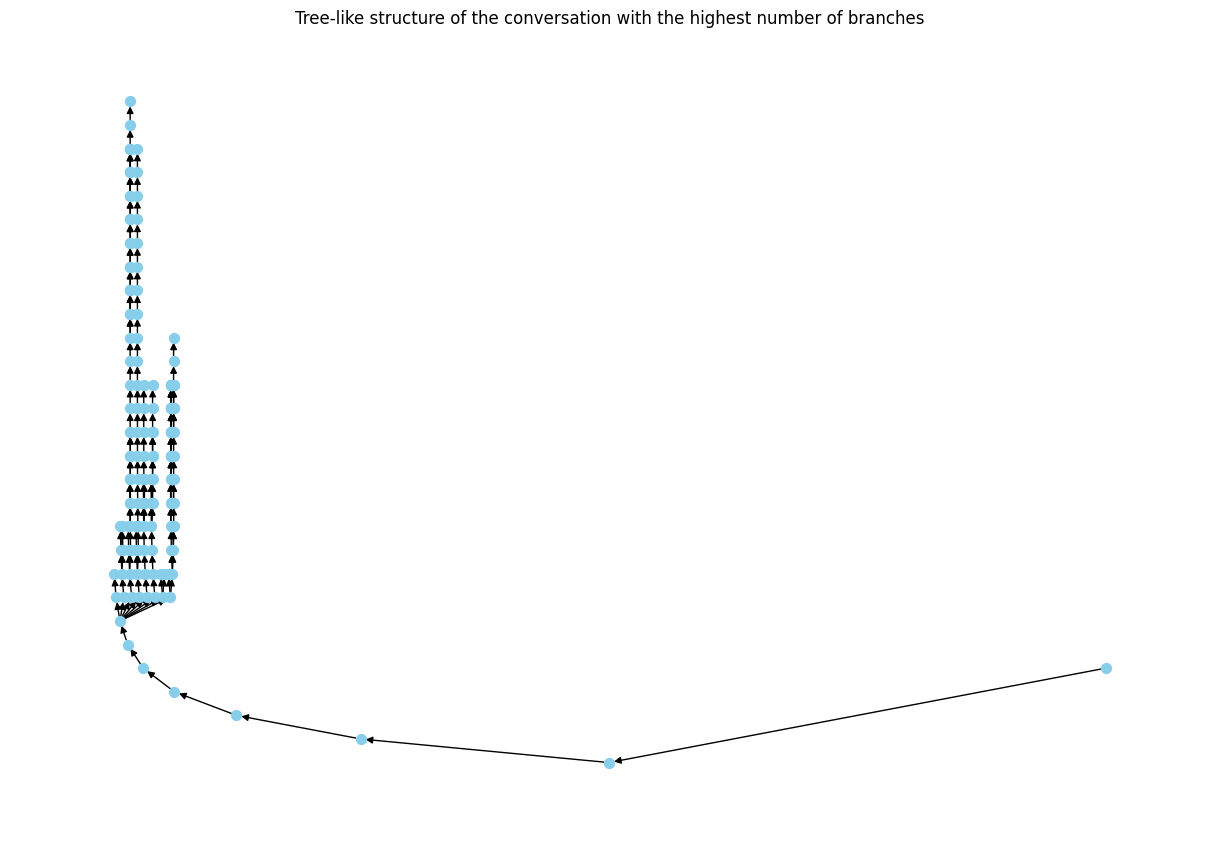

In [58]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

def build_conversation_tree(jsonl_file_path):
    conversation_trees = defaultdict(nx.DiGraph)
    branch_counts = defaultdict(int)

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            conv_id = conversation['id']
            mapping = conversation['mapping']

            for message_id, message_data in mapping.items():
                parent_id = message_data['parent']
                if parent_id:
                    conversation_trees[conv_id].add_edge(parent_id, message_id)
                    branch_counts[conv_id] += len(message_data['children']) > 1

    # Identify the conversation with the highest number of branches
    most_branches_conv_id = max(branch_counts, key=branch_counts.get)
    tree = conversation_trees[most_branches_conv_id]

    # Find the root node (assuming the first node with no predecessors)
    root_id = next((n for n in tree if not list(tree.predecessors(n))), None)
    
    return tree, root_id

def hierarchy_pos(G, root, levels=None, width=1., height=1.):
    '''If there is a cycle that is reachable from root, then this will see infinite recursion.
       G: the graph
       root: the root node of current branch
       width and height: the width and height of the layout box
    '''
    def _hierarchy_pos(G, root, width=1., vert_gap=0.2, xcenter=0.5, pos=None, parent=None, parsed=[]):
        if pos is None:
            pos = {root:(xcenter,1)}
        else:
            pos[root] = (xcenter, vert_gap * levels[root])
        neighbors = list(G.neighbors(root))
        if len(neighbors) != 0:
            dx = width / 2
            nextx = xcenter - width/2 - dx/2
            for neighbor in neighbors:
                nextx += dx
                pos = _hierarchy_pos(G, neighbor, width=dx, xcenter=nextx, pos=pos, parent=root, vert_gap=vert_gap)
        return pos
    
    if levels is None:
        levels = defaultdict(lambda: -1)
        def _set_levels(G, root, level=0):
            levels[root] = level
            for neighbor in G.neighbors(root):
                if levels[neighbor] == -1:
                    _set_levels(G, neighbor, level+1)
        _set_levels(G, root)
    
    pos = _hierarchy_pos(G, root, width=width, xcenter=0.5)
    return pos

# Replace 'conversations.jsonl' with the path to your actual JSONL file
conversation_tree, root_id = build_conversation_tree('conversations.jsonl')

if conversation_tree:
    pos = hierarchy_pos(conversation_tree, root_id)
    plt.figure(figsize=(12, 8))
    nx.draw(conversation_tree, pos=pos, with_labels=False, node_size=50, node_color="skyblue", font_size=1)
    plt.title("Tree-like structure of the conversation with the highest number of branches")
    plt.show()
else:
    print("No conversation tree to visualize.")

In [50]:
def find_conversation_with_most_leaves(jsonl_file_path):
    conversation_leaf_counts = defaultdict(int)

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            conv_id = conversation['id']
            mapping = conversation['mapping']

            # Count leaf nodes (nodes with no children)
            leaf_nodes = {message_id for message_id, message_data in mapping.items() if not message_data['children']}
            conversation_leaf_counts[conv_id] = len(leaf_nodes)

    # Identify the conversation with the most leaf nodes
    most_leaves_conv_id = max(conversation_leaf_counts, key=conversation_leaf_counts.get)

    return most_leaves_conv_id, conversation_leaf_counts[most_leaves_conv_id]

# Replace 'conversations.jsonl' with the path to your actual JSONL file
most_leaves_conv_id, most_leaves_count = find_conversation_with_most_leaves('conversations.jsonl')

print(f"Conversation ID with the most leaves: {most_leaves_conv_id}")
print(f"Number of leaves in the conversation: {most_leaves_count}")

Conversation ID with the most leaves: a6d559a4-6fa1-4449-8441-aab0bc1faa74
Number of leaves in the conversation: 39


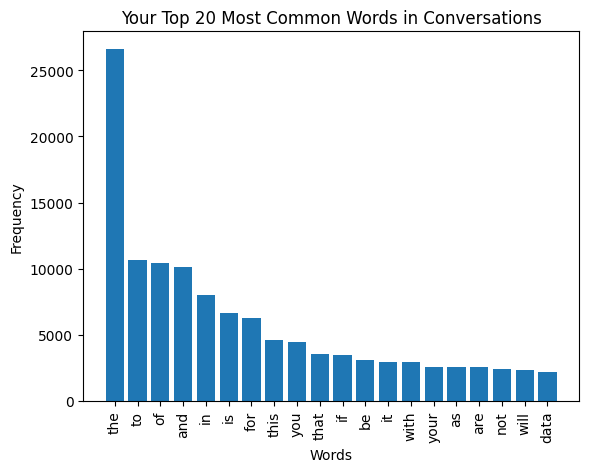

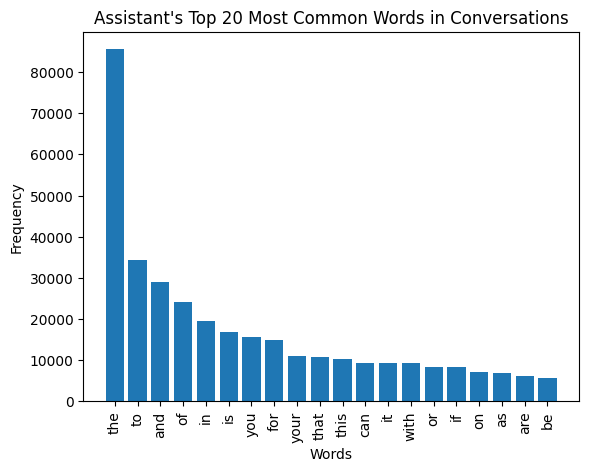

In [2]:
from collections import Counter
import json
import matplotlib.pyplot as plt
import re

def word_frequency_analysis(jsonl_file_path, author_role):
    word_counter = Counter()

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            mapping = conversation['mapping']

            for message_id, message_data in mapping.items():
                if message_data['message'] and 'author' in message_data['message']:
                    author = message_data['message']['author']['role']
                    if author == author_role and 'content' in message_data['message']:
                        content = message_data['message']['content']
                        if 'parts' in content:
                            message_content = content['parts']
                            for part in message_content:
                                if isinstance(part, str):
                                    words = re.findall(r'\b(?!(?:\d+|\b\w{1}\b(?!a)\b))\w+\b', part.lower())
                                    word_counter.update(words)

    return word_counter

# Replace 'conversations.jsonl' with the path to your actual JSONL file
your_word_counter = word_frequency_analysis('conversations.jsonl', 'user')
assistant_word_counter = word_frequency_analysis('conversations.jsonl', 'assistant')

# Identify the top words used by you and the assistant
your_most_common_words = your_word_counter.most_common(20)
assistant_most_common_words = assistant_word_counter.most_common(20)

# Prepare data for the bar charts
your_words, your_frequencies = zip(*your_most_common_words)
assistant_words, assistant_frequencies = zip(*assistant_most_common_words)

# Create bar chart for your top words
plt.bar(your_words, your_frequencies)
plt.xticks(rotation=90)  # Rotate the x-axis labels to show them clearly
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Your Top 20 Most Common Words in Conversations')
plt.show()

# Create bar chart for assistant's top words
plt.bar(assistant_words, assistant_frequencies)
plt.xticks(rotation=90)  # Rotate the x-axis labels to show them clearly
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title("Assistant's Top 20 Most Common Words in Conversations")
plt.show()

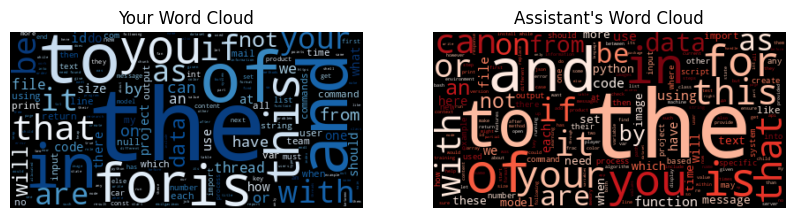

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Replace 'conversations.jsonl' with the path to your actual JSONL file
your_word_counter = word_frequency_analysis('conversations.jsonl', 'user')
assistant_word_counter = word_frequency_analysis('conversations.jsonl', 'assistant')

# Generate word clouds with a different color scheme
your_wordcloud = WordCloud(colormap='Blues').generate_from_frequencies(your_word_counter)
assistant_wordcloud = WordCloud(colormap='Reds').generate_from_frequencies(assistant_word_counter)

# Plot word clouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(your_wordcloud, interpolation='bilinear')
ax1.set_title('Your Word Cloud')
ax1.axis('off')
ax2.imshow(assistant_wordcloud, interpolation='bilinear')
ax2.set_title("Assistant's Word Cloud")
ax2.axis('off')

plt.show()

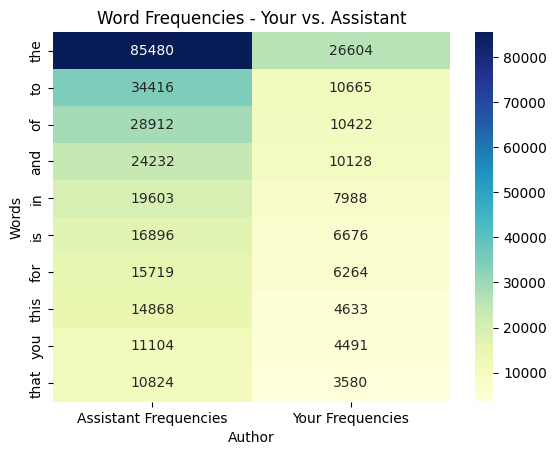

In [8]:
import seaborn as sns
import pandas as pd

# Replace 'conversations.jsonl' with the path to your actual JSONL file
your_word_counter = word_frequency_analysis('conversations.jsonl', 'user')
assistant_word_counter = word_frequency_analysis('conversations.jsonl', 'assistant')

# Prepare data for heatmap
your_words, your_frequencies = zip(*your_word_counter.most_common(10))
assistant_words, assistant_frequencies = zip(*assistant_word_counter.most_common(10))

# Create dataframe for heatmap
data = {
    'Your Words': your_words,
    'Your Frequencies': your_frequencies,
    'Assistant Words': assistant_words,
    'Assistant Frequencies': assistant_frequencies
}
df = pd.DataFrame(data)

# Set the words as the index
df.set_index('Your Words', inplace=True)

# Create heatmap
sns.heatmap(df[['Assistant Frequencies', 'Your Frequencies']], annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Author')
plt.ylabel('Words')
plt.title('Word Frequencies - Your vs. Assistant')
plt.show()

In [13]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to read the JSONL file and extract the messages as a list
def extract_messages(jsonl_file_path, author_role):
    messages = []

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            mapping = conversation['mapping']

            for message_id, message_data in mapping.items():
                if message_data['message'] and 'author' in message_data['message']:
                    author = message_data['message']['author']['role']
                    if author == author_role and 'content' in message_data['message']:
                        content = message_data['message']['content']
                        if 'parts' in content:
                            message_content = ' '.join(part for part in content['parts'] if isinstance(part, str))
                            messages.append(message_content)

    return messages

# Replace 'conversations.jsonl' with the path to your actual JSONL file
user_messages = extract_messages('conversations.jsonl', 'user')
assistant_messages = extract_messages('conversations.jsonl', 'assistant')

# Combine all messages for TF-IDF analysis
all_messages = user_messages + assistant_messages

# Create the TF-IDF vectorizer and fit it to the messages
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(all_messages)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Function to get top keywords for each role
def get_top_keywords(tfidf_matrix, feature_names, messages, top_n=10):
    # Sum tfidf scores for each word across all messages
    summed_tfidf = tfidf_matrix.sum(axis=0)
    
    # Get the top keywords and their scores
    top_indices = summed_tfidf.argsort()[0, -top_n:].tolist()[::-1]
    top_scores = summed_tfidf[0, top_indices].tolist()[0]
    top_words = [feature_names[i] for i in top_indices]
    
    # Combine scores and words
    keywords = list(zip(top_words, top_scores))
    return keywords

# Get top keywords for user and assistant
user_top_keywords = get_top_keywords(tfidf_matrix[:len(user_messages)], feature_names, user_messages)
assistant_top_keywords = get_top_keywords(tfidf_matrix[len(user_messages):], feature_names, assistant_messages)

print("User Top Keywords:", user_top_keywords)
print("Assistant Top Keywords:", assistant_top_keywords)

User Top Keywords: [(array(['10', 'use', 'explain', 'make', 'project', 'file', 'data', 'does',
       'write', 'code'], dtype=object), 39.0957844772243)]
Assistant Top Keywords: [(array(['image', 'message', 'model', 'using', 'project', 'use', 'function',
       'code', 'file', 'data'], dtype=object), 69.63352950365017)]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilgasimov/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


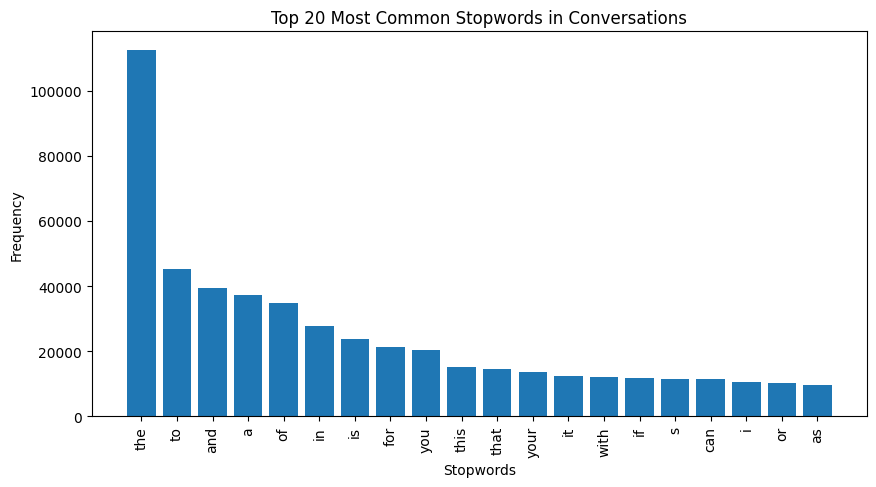

In [17]:
import json
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt

# Ensure that the stopwords dataset is downloaded
nltk.download('stopwords')

# Load English stopwords from nltk and define additional custom stopwords if necessary
english_stopwords = set(stopwords.words('english'))
custom_stopwords = {'please', 'thank', 'hello', 'hi'}  # Add custom stopwords if needed
all_stopwords = english_stopwords.union(custom_stopwords)

# Function to count stopwords
def count_stopwords(jsonl_file_path, stopwords_set):
    stopword_counter = Counter()

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            mapping = conversation['mapping']

            for message_id, message_data in mapping.items():
                if message_data['message'] and 'content' in message_data['message']:
                    content = message_data['message']['content']
                    if 'parts' in content:
                        message_content = ' '.join(part for part in content['parts'] if isinstance(part, str))
                        words = re.findall(r'\b\w+\b', message_content.lower())
                        stopwords_in_message = [word for word in words if word in stopwords_set]
                        stopword_counter.update(stopwords_in_message)

    return stopword_counter

# Replace 'conversations.jsonl' with the path to your actual JSONL file
stopwords_frequency = count_stopwords('conversations.jsonl', all_stopwords)

# Identify the most common stopwords
most_common_stopwords = stopwords_frequency.most_common(20)

# Prepare data for the bar chart
stopwords, frequencies = zip(*most_common_stopwords)

# Create bar chart for the top stopwords
plt.figure(figsize=(10, 5))
plt.bar(stopwords, frequencies)
plt.xticks(rotation=90)  # Rotate the x-axis labels to show them clearly
plt.xlabel('Stopwords')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Stopwords in Conversations')
plt.show()

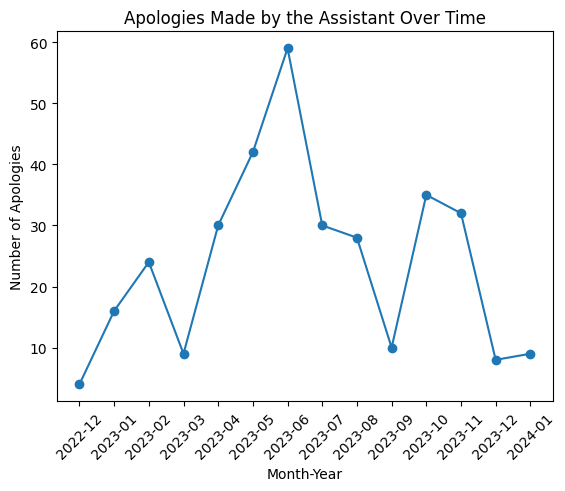

In [19]:
import json
import matplotlib.pyplot as plt
from datetime import datetime

# Define a list of apology-related words and phrases
apology_phrases = ['sorry', 'apologize', 'apologies', 'regret']

# Function to track apologies by timestamp
def track_apologies_over_time(jsonl_file_path, apology_phrases):
    apology_timestamps = []

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            mapping = conversation['mapping']

            for message_id, message_data in mapping.items():
                if message_data['message'] and 'author' in message_data['message']:
                    author = message_data['message']['author']['role']
                    # Check if the author is the assistant
                    if author == 'assistant':
                        content = message_data['message']['content']
                        if 'parts' in content:
                            message_content = ' '.join(part for part in content['parts'] if isinstance(part, str)).lower()
                            # Check if any of the apology phrases are in the message content
                            if any(apology_phrase in message_content for apology_phrase in apology_phrases):
                                timestamp = message_data['message']['create_time']
                                apology_timestamps.append(datetime.fromtimestamp(timestamp))

    return apology_timestamps

# Replace 'conversations.jsonl' with the path to your actual JSONL file
apology_timestamps = track_apologies_over_time('conversations.jsonl', apology_phrases)

# Count the number of apologies per month
apology_counts_per_month = {}
for timestamp in apology_timestamps:
    month_year = timestamp.strftime("%Y-%m")
    apology_counts_per_month[month_year] = apology_counts_per_month.get(month_year, 0) + 1

# Sort the month-year keys in ascending order
sorted_month_years = sorted(apology_counts_per_month.keys())

# Prepare data for the line chart
months = sorted_month_years
apology_counts = [apology_counts_per_month[month_year] for month_year in sorted_month_years]

# Create line chart
plt.plot(months, apology_counts, marker='o')
plt.xlabel('Month-Year')
plt.ylabel('Number of Apologies')
plt.title('Apologies Made by the Assistant Over Time')
plt.xticks(rotation=45)
plt.show()

In [20]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/emilgasimov/nltk_data...


True

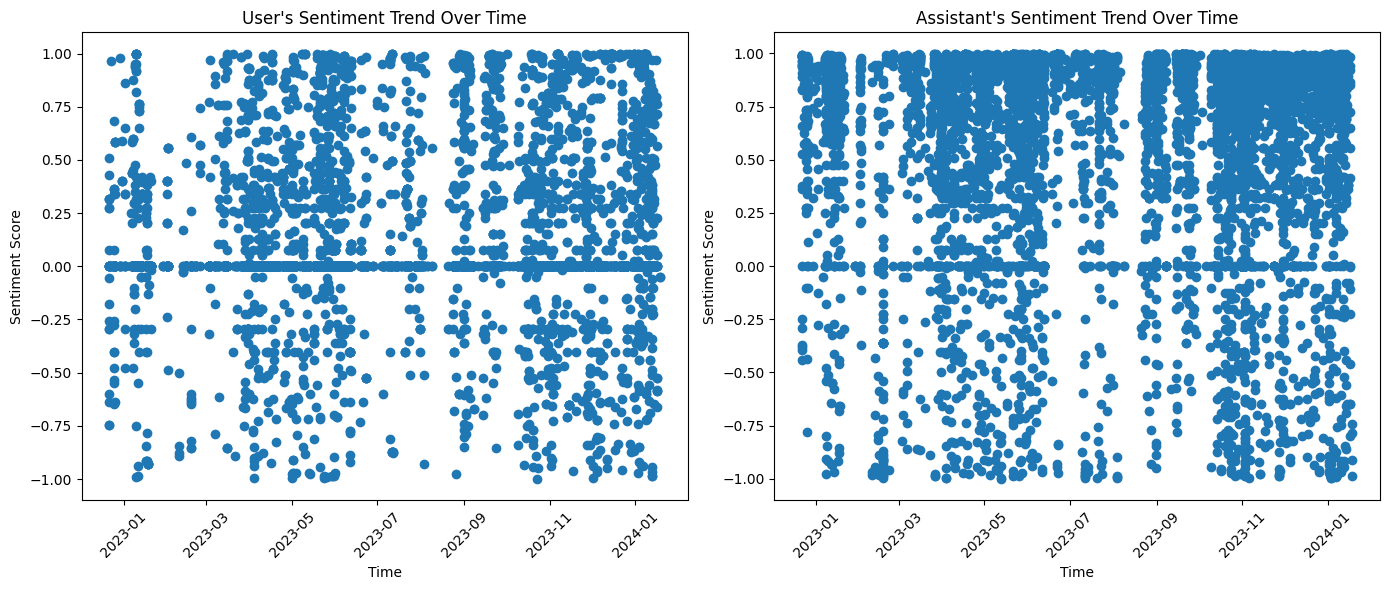

In [25]:
import json
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from datetime import datetime

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis on messages
def sentiment_analysis(jsonl_file_path):
    sentiment_data = {}

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            mapping = conversation['mapping']

            for message_id, message_data in mapping.items():
                if message_data['message'] and 'content' in message_data['message']:
                    content = message_data['message']['content']
                    if 'parts' in content:
                        message_content = ' '.join(part for part in content['parts'] if isinstance(part, str))
                        sentiment_score = sia.polarity_scores(message_content)
                        create_time = message_data['message']['create_time']
                        # Check if create_time is not None
                        if create_time is not None:
                            timestamp = datetime.fromtimestamp(create_time)
                        else:
                            # Handle the None case as appropriate, e.g., continue to the next message
                            continue
                        author = message_data['message']['author']['role']
                        # Initialize a list for the author if it doesn't exist
                        if author not in sentiment_data:
                            sentiment_data[author] = []
                        sentiment_data[author].append({
                            'message_id': message_id,
                            'text': message_content,
                            'sentiment': sentiment_score['compound'],
                            'timestamp': timestamp
                        })

    return sentiment_data

# Replace 'conversations.jsonl' with the path to your actual JSONL file
sentiment_data = sentiment_analysis('conversations.jsonl')

# Define the authors we're interested in
authors_of_interest = ['user', 'assistant']

# Plot sentiment trend for each author of interest
plt.figure(figsize=(14, 6))
for i, author in enumerate(authors_of_interest, 1):
    author_sentiment_data = sentiment_data.get(author, [])
    author_sentiment_data.sort(key=lambda x: x['timestamp'])
    
    timestamps = [data['timestamp'] for data in author_sentiment_data]
    sentiments = [data['sentiment'] for data in author_sentiment_data]
    
    plt.subplot(1, len(authors_of_interest), i)
    plt.scatter(timestamps, sentiments, marker='o')
    plt.xlabel('Time')
    plt.ylabel('Sentiment Score')
    plt.title(f"{author.capitalize()}'s Sentiment Trend Over Time")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

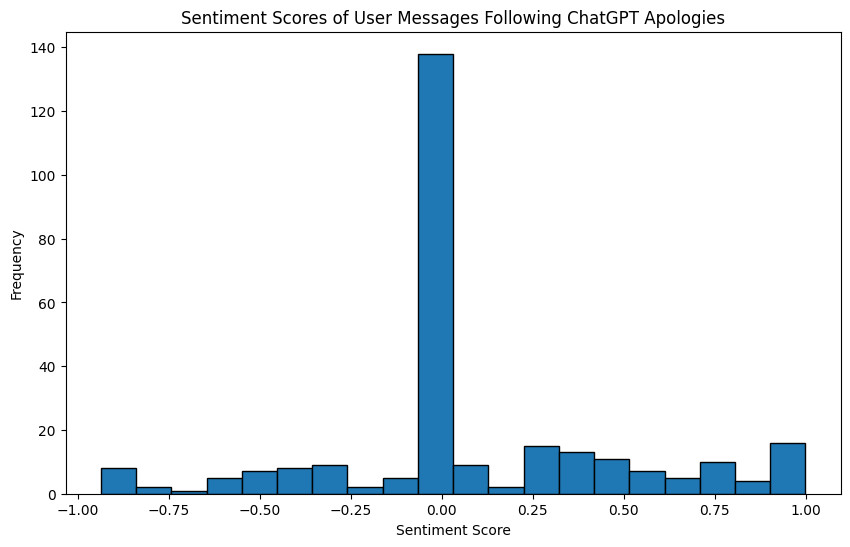

Mean sentiment score of user messages following ChatGPT apologies: 0.09


In [29]:
import json
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Define a list of apology-related words and phrases
apology_phrases = ['sorry', 'apologize', 'apologies', 'regret']

# Function to analyze sentiments of responses after ChatGPT apologies
def analyze_sentiment_after_apologies(jsonl_file_path, apology_phrases):
    sentiment_scores = []  # List to hold sentiment scores of user messages after ChatGPT apologies
    last_was_apology = False  # Flag to track if the last message by ChatGPT was an apology

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            mapping = conversation['mapping']

            for message_id, message_data in mapping.items():
                if message_data['message'] and 'content' in message_data['message']:
                    content = message_data['message']['content']
                    author = message_data['message']['author']['role']
                    if 'parts' in content:
                        message_content = ' '.join(part for part in content['parts'] if isinstance(part, str)).lower()
                        # Check if the author is ChatGPT and if the message contains an apology
                        if author == 'assistant':
                            last_was_apology = any(apology_phrase in message_content for apology_phrase in apology_phrases)
                        # If the last message was an apology and the current author is the user, analyze sentiment
                        elif author == 'user' and last_was_apology:
                            sentiment_score = sia.polarity_scores(message_content)['compound']
                            sentiment_scores.append(sentiment_score)
                            last_was_apology = False  # Reset the flag as we've found the user response after an apology

    return sentiment_scores

# Replace 'conversations.jsonl' with the path to your actual JSONL file
sentiment_scores = analyze_sentiment_after_apologies('conversations.jsonl', apology_phrases)

# Plot the sentiment scores of user messages after ChatGPT apologies
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores, bins=20, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Scores of User Messages Following ChatGPT Apologies')
plt.show()

# Optionally, print out the mean sentiment score
if sentiment_scores:
    mean_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    print(f"Mean sentiment score of user messages following ChatGPT apologies: {mean_sentiment:.2f}")
else:
    print("No user messages following ChatGPT apologies found in the data.")

In [38]:
import json

# Load JSON data from words.json
with open('words.json', 'r') as json_file:
    data = json.load(json_file)

# Create a new text file for writing
with open('gre.txt', 'w') as txt_file:
    # Iterate through each word in the JSON data
    for word, info in data.items():
        # Write each word on a new line in the text file
        txt_file.write(word + '\n')

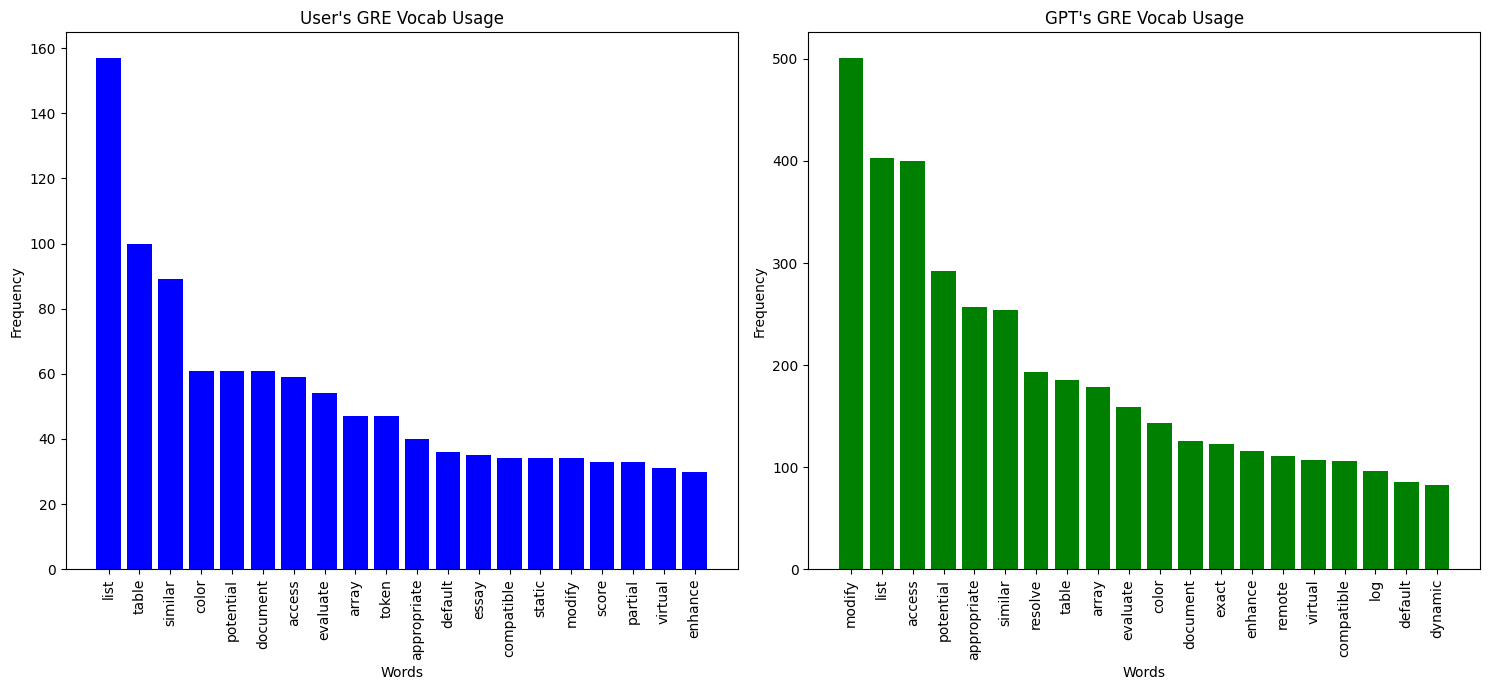

In [40]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Load GRE vocabulary words from a file
gre_vocab = set()
with open('gre.txt', 'r') as file:
    for line in file:
        gre_vocab.add(line.strip().lower())

# Function to count GRE vocabulary in messages
def count_gre_vocab_usage(jsonl_file_path, vocab_set):
    user_vocab_counter = Counter()
    gpt_vocab_counter = Counter()

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            mapping = conversation['mapping']

            for message_id, message_data in mapping.items():
                if message_data['message'] and 'content' in message_data['message']:
                    author = message_data['message']['author']['role']
                    parts = message_data['message']['content'].get('parts', [])
                    message_content = ' '.join(part for part in parts if isinstance(part, str)).lower()
                    words = message_content.split()
                    vocab_words = set(words) & vocab_set
                    if author == 'user':
                        user_vocab_counter.update(vocab_words)
                    elif author == 'assistant':
                        gpt_vocab_counter.update(vocab_words)

    return user_vocab_counter, gpt_vocab_counter

# Replace 'conversations.jsonl' with the path to your actual JSONL file
user_vocab_usage, gpt_vocab_usage = count_gre_vocab_usage('conversations.jsonl', gre_vocab)

# Visualize the top 20 GRE words used by the user and GPT
user_common_vocab = user_vocab_usage.most_common(20)
gpt_common_vocab = gpt_vocab_usage.most_common(20)

# Prepare data for bar charts
user_words, user_counts = zip(*user_common_vocab)
gpt_words, gpt_counts = zip(*gpt_common_vocab)

plt.figure(figsize=(15, 7))

# Bar chart for user's GRE vocab usage
plt.subplot(1, 2, 1)
plt.bar(user_words, user_counts, color='blue')
plt.title("User's GRE Vocab Usage")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Bar chart for GPT's GRE vocab usage
plt.subplot(1, 2, 2)
plt.bar(gpt_words, gpt_counts, color='green')
plt.title("GPT's GRE Vocab Usage")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [41]:
import json
from collections import Counter

# Load GRE vocabulary words from a file
gre_vocab = set()
with open('gre.txt', 'r') as file:
    for line in file:
        gre_vocab.add(line.strip().lower())

# Function to count GRE vocabulary in messages and gather statistics
def gre_vocab_usage_stats(jsonl_file_path, vocab_set):
    user_vocab_counter = Counter()
    gpt_vocab_counter = Counter()
    user_messages_with_gre = 0
    gpt_messages_with_gre = 0
    user_total_messages = 0
    gpt_total_messages = 0

    with open(jsonl_file_path, 'r') as file:
        for line in file:
            conversation = json.loads(line)
            mapping = conversation['mapping']

            for message_id, message_data in mapping.items():
                if message_data['message'] and 'content' in message_data['message']:
                    author = message_data['message']['author']['role']
                    parts = message_data['message']['content'].get('parts', [])
                    message_content = ' '.join(part for part in parts if isinstance(part, str)).lower()
                    words = message_content.split()
                    vocab_words = set(words) & vocab_set
                    if vocab_words:
                        if author == 'user':
                            user_messages_with_gre += 1
                            user_vocab_counter.update(vocab_words)
                        elif author == 'assistant':
                            gpt_messages_with_gre += 1
                            gpt_vocab_counter.update(vocab_words)
                    if author == 'user':
                        user_total_messages += 1
                    elif author == 'assistant':
                        gpt_total_messages += 1

    # Calculate stats
    user_total_gre_words = sum(user_vocab_counter.values())
    gpt_total_gre_words = sum(gpt_vocab_counter.values())
    user_unique_gre_words = len(user_vocab_counter)
    gpt_unique_gre_words = len(gpt_vocab_counter)

    stats = {
        'user': {
            'total_gre_words': user_total_gre_words,
            'unique_gre_words': user_unique_gre_words,
            'messages_with_gre': user_messages_with_gre,
            'total_messages': user_total_messages,
            'proportion_with_gre': user_messages_with_gre / user_total_messages if user_total_messages > 0 else 0
        },
        'gpt': {
            'total_gre_words': gpt_total_gre_words,
            'unique_gre_words': gpt_unique_gre_words,
            'messages_with_gre': gpt_messages_with_gre,
            'total_messages': gpt_total_messages,
            'proportion_with_gre': gpt_messages_with_gre / gpt_total_messages if gpt_total_messages > 0 else 0
        }
    }
    return stats

# Replace 'conversations.jsonl' with the path to your actual JSONL file
stats = gre_vocab_usage_stats('conversations.jsonl', gre_vocab)

# Print the stats
for author, author_stats in stats.items():
    print(f"{author.capitalize()} GRE Vocabulary Usage Stats:")
    print(f"  Total GRE words used: {author_stats['total_gre_words']}")
    print(f"  Unique GRE words used: {author_stats['unique_gre_words']}")
    print(f"  Messages with at least one GRE word: {author_stats['messages_with_gre']}")
    print(f"  Total messages: {author_stats['total_messages']}")
    print(f"  Proportion of messages with GRE words: {author_stats['proportion_with_gre']:.2f}")
    print()

User GRE Vocabulary Usage Stats:
  Total GRE words used: 2562
  Unique GRE words used: 327
  Messages with at least one GRE word: 1050
  Total messages: 5005
  Proportion of messages with GRE words: 0.21

Gpt GRE Vocabulary Usage Stats:
  Total GRE words used: 7104
  Unique GRE words used: 403
  Messages with at least one GRE word: 3702
  Total messages: 6150
  Proportion of messages with GRE words: 0.60



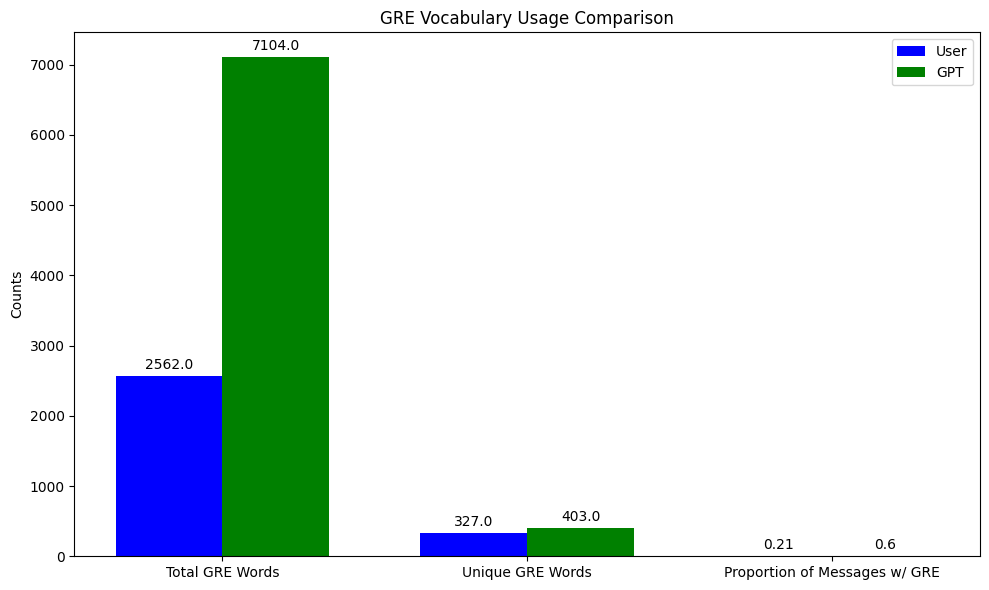

In [43]:
import matplotlib.pyplot as plt

# Assuming 'stats' is the dictionary obtained from the gre_vocab_usage_stats function

# Create lists for plotting
labels = ['Total GRE Words', 'Unique GRE Words', 'Proportion of Messages w/ GRE']
user_values = [
    stats['user']['total_gre_words'],
    stats['user']['unique_gre_words'],
    round(stats['user']['proportion_with_gre'], 2)  # Decrease precision to two digits after the decimal point
]
gpt_values = [
    stats['gpt']['total_gre_words'],
    stats['gpt']['unique_gre_words'],
    round(stats['gpt']['proportion_with_gre'], 2)  # Decrease precision to two digits after the decimal point
]

x = range(len(labels))  # the label locations

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Define the width of the bars
bar_width = 0.35

# Plot bars for user and GPT
rects1 = ax.bar(x, user_values, bar_width, label='User', color='blue')
rects2 = ax.bar([p + bar_width for p in x], gpt_values, bar_width, label='GPT', color='green')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('GRE Vocabulary Usage Comparison')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Label the values on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.tight_layout()
plt.show()